<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Task 3: Visualize the Data
---

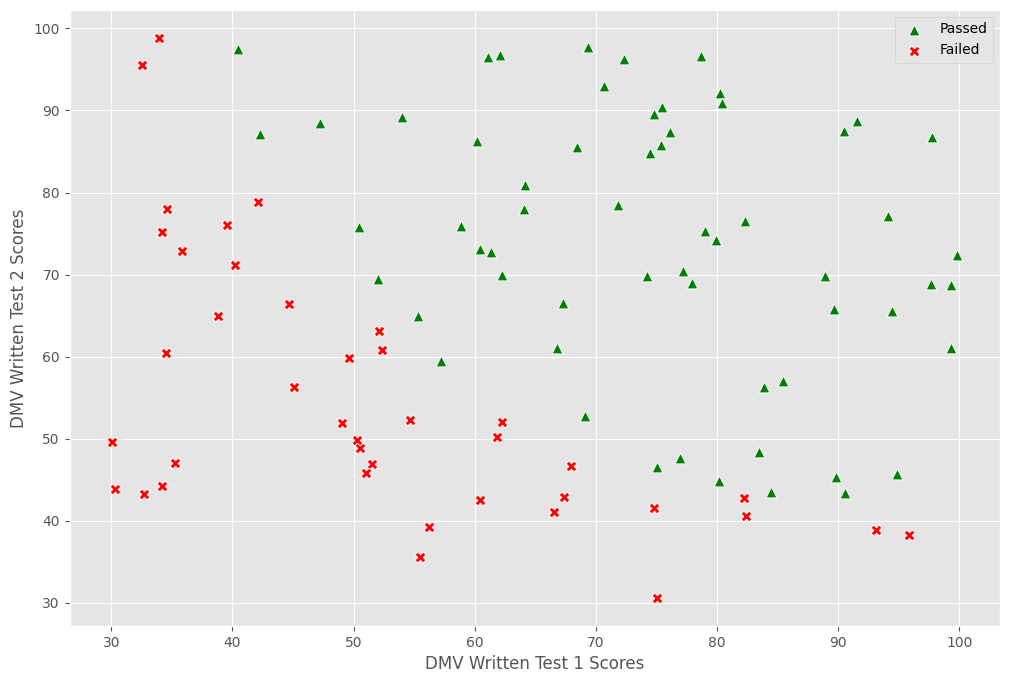

In [6]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0], y = scores[passed[:, 0], 1], marker = "^", color = "green", s=60)

sns.scatterplot(x = scores[failed[:, 0], 0], y = scores[failed[:, 0], 1], marker = "X", color = "red", s=60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(['Passed', 'Failed'])
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [ ]:
def logistic_function(x)->float:
    return 1 / (1 + np.exp(-x))

In [14]:
logistic_function(0)

np.float64(0.5)

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [21]:
def compute_cost(theta, x, y)->tuple:
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = - 1/m * sum(error)
    gradient = 1/m * np.dot(x.transpose(), (y_pred - y))
    return cost[0], gradient

### Task 6: Cost and Gradient at Initialization
---

In [28]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradients at initialization", gradient)

Cost at initialization 0.693147180559946
Gradients at initialization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [29]:
def gradient_descent(x, y, theta, alpha, iterations)->tuple:
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [30]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [31]:
print("Theta after running graident descent: ", theta)
print("Resulting cost: ", costs[-1])

Theta after running graident descent:  [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost:  0.2048938203512014


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\miguelestradam36\AppData\Local\Temp\ipykernel_19488\268672217.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Values of Cost Function over Iterations of Gradient Descent')

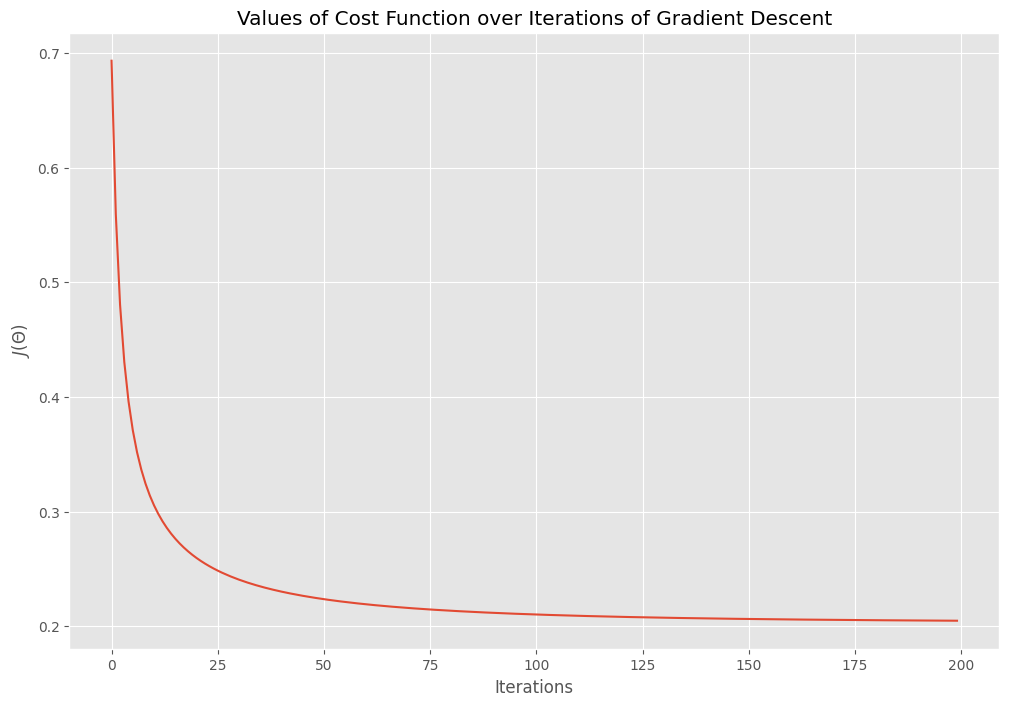

In [32]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over Iterations of Gradient Descent")

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

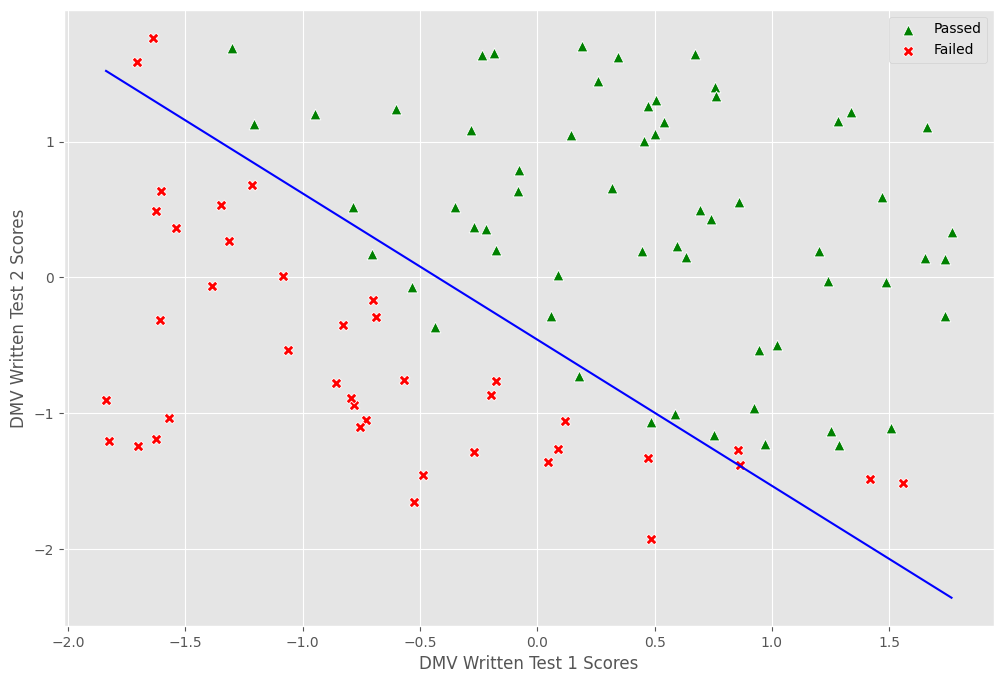

In [34]:
ax = sns.scatterplot(x = X[passed[:, 0], 1], y = X[passed[:, 0], 2], marker = "^", color = "green", s=60)

sns.scatterplot(x = X[failed[:, 0], 1], y = X[failed[:, 0], 2], marker = "X", color = "red", s=60)

ax.legend(['Passed', 'Failed'])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x=x_boundary, y=y_boundary, color="blue")
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [41]:
def predict(theta, x)->bool:
    results = x.dot(theta)
    return results > 0

In [40]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0], "%")

Training Accuracy: 89 %
